In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from scipy import stats as st

# pd.read_csv("../")
db = pd.read_csv("dataset/framingham.csv")

In [2]:
db.head()
print("Rows: ", db.shape[0])
print("Columns: ", db.shape[1])
missing_percentage = (db.isnull().sum() / db.shape[0]) * 100
print(missing_percentage)

Rows:  11627
Columns:  39
RANDID       0.000000
SEX          0.000000
TOTCHOL      3.517674
AGE          0.000000
SYSBP        0.000000
DIABP        0.000000
CURSMOKE     0.000000
CIGPDAY      0.679453
BMI          0.447235
DIABETES     0.000000
BPMEDS       5.100198
HEARTRTE     0.051604
GLUCOSE     12.384966
educ         2.537198
PREVCHD      0.000000
PREVAP       0.000000
PREVMI       0.000000
PREVSTRK     0.000000
PREVHYP      0.000000
TIME         0.000000
PERIOD       0.000000
HDLC        73.965769
LDLC        73.974370
DEATH        0.000000
ANGINA       0.000000
HOSPMI       0.000000
MI_FCHD      0.000000
ANYCHD       0.000000
STROKE       0.000000
CVD          0.000000
HYPERTEN     0.000000
TIMEAP       0.000000
TIMEMI       0.000000
TIMEMIFC     0.000000
TIMECHD      0.000000
TIMESTRK     0.000000
TIMECVD      0.000000
TIMEDTH      0.000000
TIMEHYP      0.000000
dtype: float64


In [3]:
# if 'RANDID' in db.columns:
#     db.drop(columns=['RANDID'], inplace=True)
if 'educ' in db.columns:
    db.drop(columns=['educ'], inplace=True)
if 'HDLC' in db.columns:
    db.drop(columns=['HDLC'], inplace=True)
if 'LDLC' in db.columns:
    db.drop(columns=['LDLC'], inplace=True)

In [4]:
# 1. TOTCHOL (Total Cholesterol)
# Null values replace by mean of the column
db['TOTCHOL'].fillna(db['TOTCHOL'].mean(), inplace=True)

# 2. CIGPDAY (Cigarettes per Day)
# Impute missing values in 'cigsPerDay' based on 'currentSmoker' as Median of respective categories
median_cigsPerDay_smoker = db[db['CURSMOKE'] == 1]['CIGPDAY'].median()
median_cigsPerDay_non_smoker = db[db['CURSMOKE'] == 0]['CIGPDAY'].median()

db.loc[(db['CURSMOKE'] == 1) & (db['CIGPDAY'].isna()), 'CIGPDAY'] = median_cigsPerDay_smoker
db.loc[(db['CURSMOKE'] == 0) & (db['CIGPDAY'].isna()), 'CIGPDAY'] = median_cigsPerDay_non_smoker


# 3. BMI (Body Mass Index)
# Impute missing values in 'BMI' based on 'Gender' and 'Age' as Median of respective categories
median_bmi_male = db[(db['SEX'] == 2) & (db['BMI'].notna())]['BMI'].median()
median_bmi_female = db[(db['SEX'] == 1) & (db['BMI'].notna())]['BMI'].median()

db.loc[(db['SEX'] == 2) & (db['BMI'].isna()), 'BMI'] = median_bmi_male
db.loc[(db['SEX'] == 1) & (db['BMI'].isna()), 'BMI'] = median_bmi_female

# 4. BPMEDS (Blood Pressure Medication)
# Split dataset into two parts: one with missing 'BPMEDS' values (to predict) and one without (to train the model)
train_data = db[~db['BPMEDS'].isna()]
predict_data = db[db['BPMEDS'].isna()]

# Select the features (SYSBP and DIABP) for training
X_train = train_data[['SYSBP', 'DIABP']]

# Target variable for training is 'BPMEDS'
y_train = train_data['BPMEDS']

# Select the features (SYSBP and DIABP) for prediction
X_predict = predict_data[['SYSBP', 'DIABP']]

# Train a Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

# Predict 'BPMEDS' values for the missing data
predicted_bpmeds = rf_classifier.predict(X_predict)

# Assign the predicted 'BPMEDS' values back to the original dataset
db.loc[db['BPMEDS'].isna(), 'BPMEDS'] = predicted_bpmeds

# 5. HEARTRTE (Heart Rate)
db['HEARTRTE'].fillna(db['HEARTRTE'].mean(), inplace=True)

# 6. GLUCOSE (Glucose Level)

# Calculate the median 'GLUCOSE' for individuals with diabetes ('DIABETES' = 1)
median_glucose_diabetes = db[db['DIABETES'] == 1]['GLUCOSE'].median()
# Calculate the median 'GLUCOSE' for individuals without diabetes ('DIABETES' = 0)
median_glucose_no_diabetes = db[db['DIABETES'] == 0]['GLUCOSE'].median()

# Impute missing 'GLUCOSE' values for individuals with diabetes
db.loc[(db['DIABETES'] == 1) & (db['GLUCOSE'].isna()), 'GLUCOSE'] = median_glucose_diabetes
# Impute missing 'GLUCOSE' values for individuals without diabetes
db.loc[(db['DIABETES'] == 0) & (db['GLUCOSE'].isna()), 'GLUCOSE'] = median_glucose_no_diabetes


In [5]:
db = db.sort_values(by=['RANDID','TIME'])

In [6]:
# Verify no null values in the dataframe
db.isnull().sum()

RANDID      0
SEX         0
TOTCHOL     0
AGE         0
SYSBP       0
DIABP       0
CURSMOKE    0
CIGPDAY     0
BMI         0
DIABETES    0
BPMEDS      0
HEARTRTE    0
GLUCOSE     0
PREVCHD     0
PREVAP      0
PREVMI      0
PREVSTRK    0
PREVHYP     0
TIME        0
PERIOD      0
DEATH       0
ANGINA      0
HOSPMI      0
MI_FCHD     0
ANYCHD      0
STROKE      0
CVD         0
HYPERTEN    0
TIMEAP      0
TIMEMI      0
TIMEMIFC    0
TIMECHD     0
TIMESTRK    0
TIMECVD     0
TIMEDTH     0
TIMEHYP     0
dtype: int64

In [7]:
data = db.drop(labels=['TIMEAP','TIMEMI','TIMEMIFC','TIMECHD',
                     'TIMESTRK','TIMEDTH','TIMEHYP','DEATH',
                     'MI_FCHD','ANYCHD','STROKE','HYPERTEN',
                     'HOSPMI','ANGINA','PERIOD','CVD','TIMECVD',],axis=1)
difcvd = pd.DataFrame((db['TIMECVD'] - db['TIME']).values,columns=['DIFCVD'])
# time = pd.DataFrame(db['TIMECVD'].values,columns=['DIFCVD'])
event = db['CVD']

In [8]:
cat = ['SEX','CURSMOKE','PREVCHD','PREVAP','PREVMI','PREVSTRK','PREVHYP','DIABETES']
data_cat = data[cat]
data_num = data.drop(labels=cat,axis=1)

In [9]:
data_num_st = pd.DataFrame(StandardScaler().fit_transform(data_num),columns=data_num.columns)
data_cat_dum = pd.get_dummies(data_cat)

data = pd.concat([data_num_st,data_cat_dum,event,difcvd],axis=1)

In [10]:
targets = ['CVD','DIFCVD']
cvd = 'CVD'
labels = event.unique()

test_stats = {}
p_vals = {}

alpha = 0.01

In [11]:
for col in data.columns:
    if(data[col].unique().shape[0]==1):
        continue

    if (col not in targets):
        if col in cat:
            observed = pd.crosstab(index = data[col], columns = data[cvd])
            test_stat, p_value, _, _ = st.chi2_contingency(observed)
        else:
            counts = [data[data[cvd] == label][col] for label in labels]
            test_stat, p_value = st.ttest_ind(counts[0],counts[1])

        test_stats[col] = test_stat
        p_vals[col] = p_value

In [12]:
results = pd.DataFrame({'Feature' : list(p_vals.keys()),
                        'CV' : list(test_stats.values()),
                        'p value' : list(p_vals.values()),
                        'Significant' : ['S' if p_val < alpha else 'X' for p_val in p_vals.values()]
                        })

In [13]:
results

,Feature,CV,p value,Significant
0,RANDID,1.362925,1.729325e-01,X
1,TOTCHOL,8.158025,3.755074e-16,S
2,AGE,23.177628,3.227599e-116,S
3,SYSBP,25.306198,1.390066e-137,S
4,DIABP,17.356944,1.205988e-66,S
5,CIGPDAY,3.527303,4.214350e-04,S
6,BMI,11.765233,8.926601e-32,S
7,BPMEDS,11.994347,5.951531e-33,S
8,HEARTRTE,1.405159,1.600006e-01,X
9,GLUCOSE,12.441476,2.610294e-35,S


In [14]:
data.columns

Index(['RANDID', 'TOTCHOL', 'AGE', 'SYSBP', 'DIABP', 'CIGPDAY', 'BMI',
       'BPMEDS', 'HEARTRTE', 'GLUCOSE', 'TIME', 'SEX', 'CURSMOKE', 'PREVCHD',
       'PREVAP', 'PREVMI', 'PREVSTRK', 'PREVHYP', 'DIABETES', 'CVD', 'DIFCVD'],
      dtype='object')

In [15]:
data = data[results[results['Significant']=='S']['Feature'].to_list()+targets]

In [16]:
data.columns

Index(['TOTCHOL', 'AGE', 'SYSBP', 'DIABP', 'CIGPDAY', 'BMI', 'BPMEDS',
       'GLUCOSE', 'TIME', 'SEX', 'PREVCHD', 'PREVAP', 'PREVMI', 'PREVSTRK',
       'PREVHYP', 'DIABETES', 'CVD', 'DIFCVD'],
      dtype='object')

In [17]:
data.describe()

,TOTCHOL,AGE,SYSBP,DIABP,CIGPDAY,BMI,BPMEDS,GLUCOSE,TIME,SEX,PREVCHD,PREVAP,PREVMI,PREVSTRK,PREVHYP,DIABETES,CVD,DIFCVD
count,1.162700e+04,1.162700e+04,1.162700e+04,1.162700e+04,1.162700e+04,1.162700e+04,1.162700e+04,1.162700e+04,1.162700e+04,11627.000000,11627.000000,11627.000000,11627.000000,11627.000000,11627.000000,11627.000000,11627.000000,11627.000000
mean,-5.720031e-16,1.338341e-16,-4.436691e-16,5.328918e-16,5.339612e-17,-4.180023e-16,-5.500030e-17,-2.627792e-16,-3.605575e-17,1.568074,0.072418,0.053926,0.032167,0.013073,0.459620,0.045584,0.249333,5209.063559
std,1.000043e+00,1.000043e+00,1.000043e+00,1.000043e+00,1.000043e+00,1.000043e+00,1.000043e+00,1.000043e+00,1.000043e+00,0.495366,0.259189,0.225882,0.176450,0.113592,0.498388,0.208589,0.432646,2903.149899
min,-3.010762e+00,-2.383216e+00,-2.317087e+00,-4.548832e+00,-6.837440e-01,-2.795680e+00,-3.013557e-01,-1.892663e+00,-1.112764e+00,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-4638.000000
25%,-6.768800e-01,-7.102561e-01,-7.160440e-01,-6.893656e-01,-6.837440e-01,-6.777805e-01,-3.013557e-01,-4.564087e-01,-1.112764e+00,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3971.500000
50%,-2.608601e-02,-8.289619e-02,-1.896738e-01,-8.900418e-02,-6.837440e-01,-1.012818e-01,-3.013557e-01,-2.029521e-01,1.131406e-01,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5495.000000
75%,5.798257e-01,7.535837e-01,5.560173e-01,5.971232e-01,9.578629e-01,5.301797e-01,-3.013557e-01,1.772329e-01,1.305213e+00,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,6917.000000
max,1.020709e+01,2.740223e+00,6.960188e+00,5.743078e+00,6.703487e+00,7.554425e+00,3.318337e+00,1.665192e+01,1.647227e+00,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8766.000000


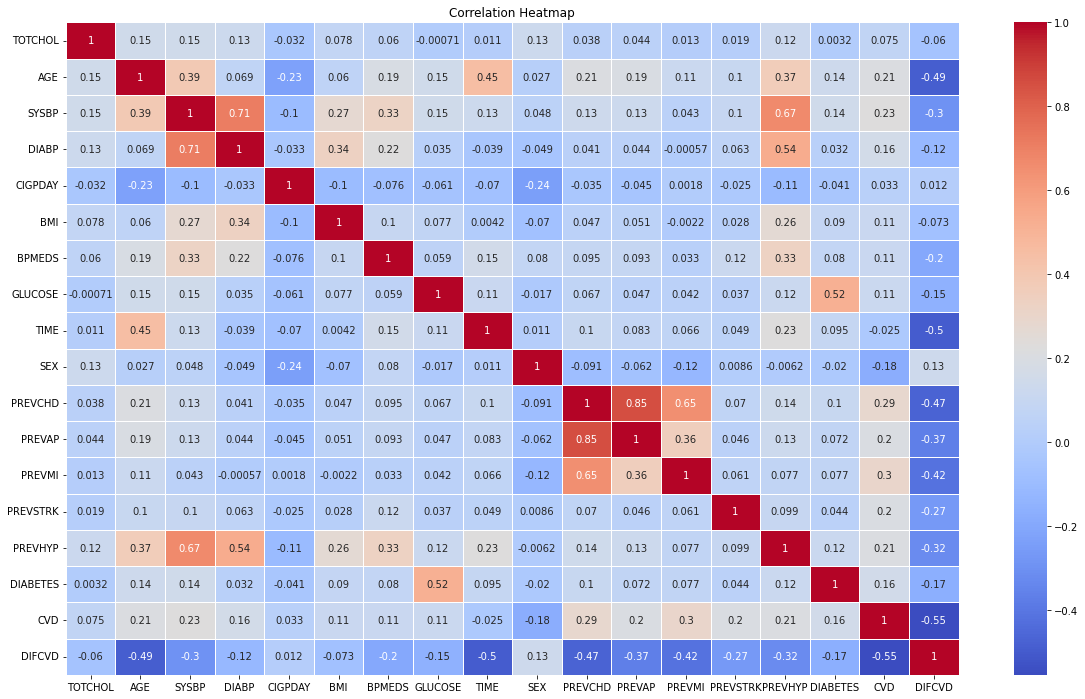

In [18]:
# Create a heatmap of the dataset
plt.figure(figsize=(20, 12))  # Set the figure size
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', linewidths=.5)

# Add a title
plt.title('Correlation Heatmap')

# Show the heatmap
plt.show()

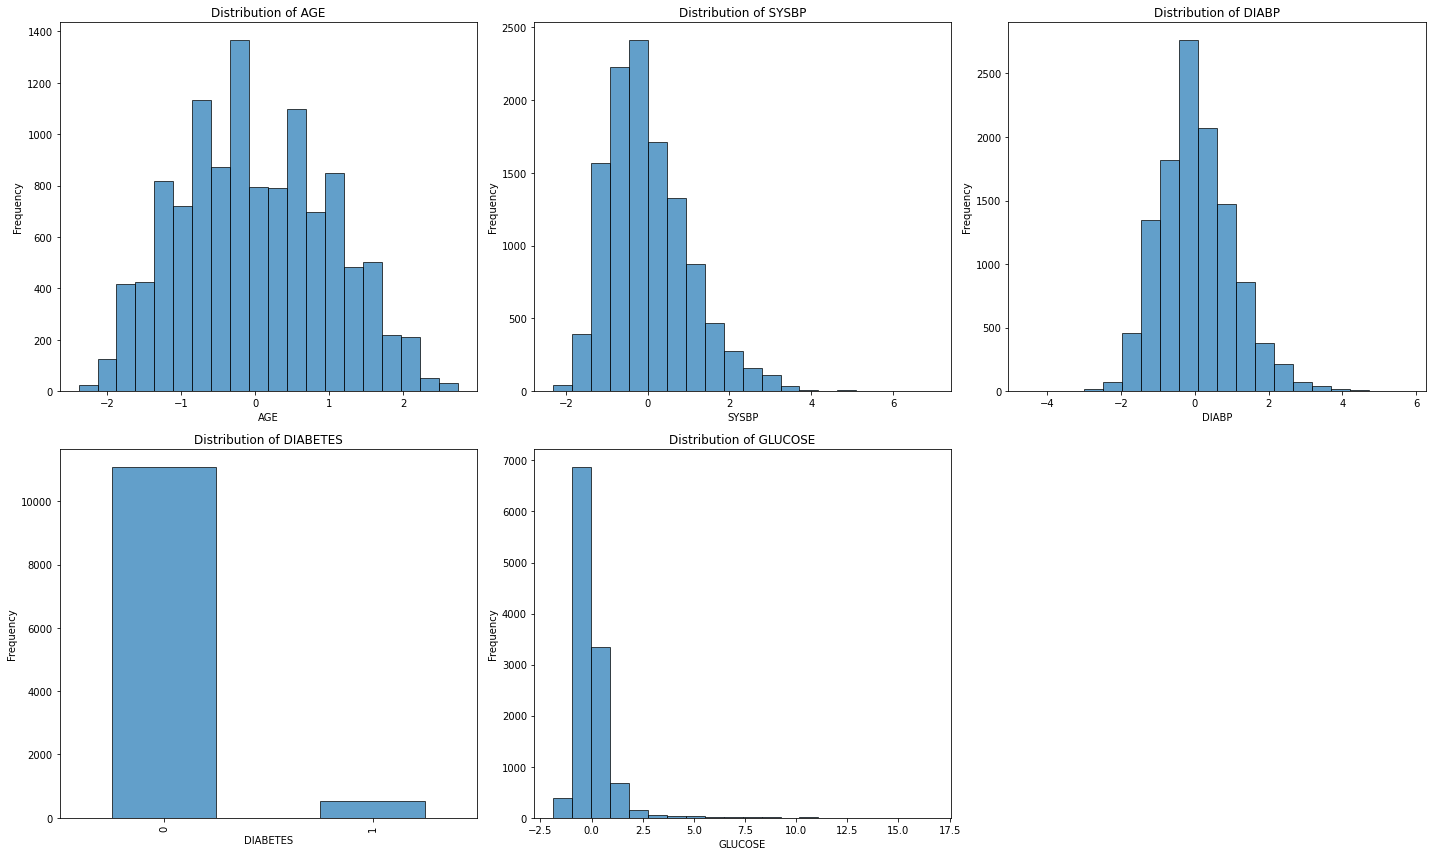

In [19]:
# Create subplots to display histograms
fig, axes = plt.subplots(2, 3, figsize=(20, 12))

# Histogram for 'AGE'
axes[0, 0].hist(data['AGE'], bins=20, edgecolor='black', alpha=0.7)
axes[0, 0].set_xlabel('AGE')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title('Distribution of AGE')

# 'SYSBP'
axes[0, 1].hist(data['SYSBP'], bins=20, edgecolor='black', alpha=0.7)
axes[0, 1].set_xlabel('SYSBP')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].set_title('Distribution of SYSBP')

# 'DIABP'
axes[0, 2].hist(data['DIABP'], bins=20, edgecolor='black', alpha=0.7)
axes[0, 2].set_xlabel('DIABP')
axes[0, 2].set_ylabel('Frequency')
axes[0, 2].set_title('Distribution of DIABP')

# Bar chart for 'DIABETES'
data['DIABETES'].value_counts().plot(kind='bar', ax=axes[1, 0], edgecolor='black', alpha=0.7)
axes[1, 0].set_xlabel('DIABETES')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].set_title('Distribution of DIABETES')

# 'GLUCOSE'
axes[1, 1].hist(data['GLUCOSE'], bins=20, edgecolor='black', alpha=0.7)
axes[1, 1].set_xlabel('GLUCOSE')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].set_title('Distribution of GLUCOSE')

fig.delaxes(axes[1, 2])
plt.tight_layout()
plt.show()


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: 

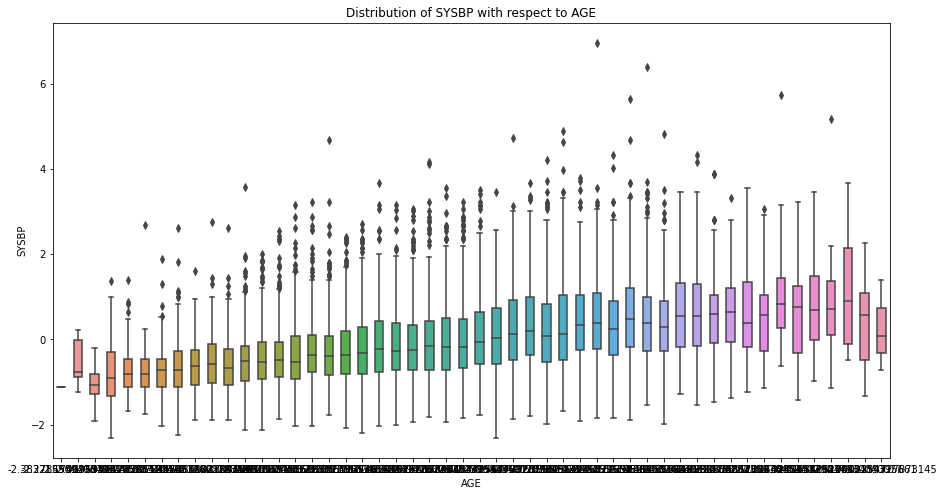

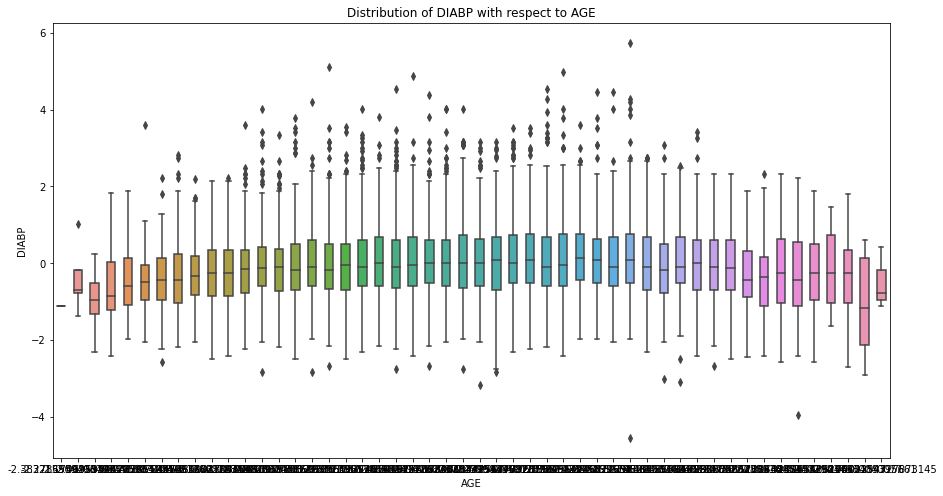

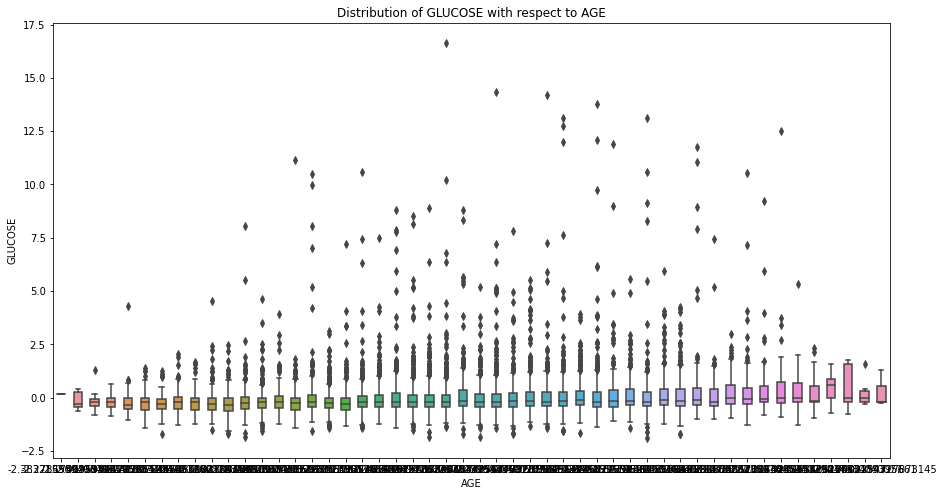

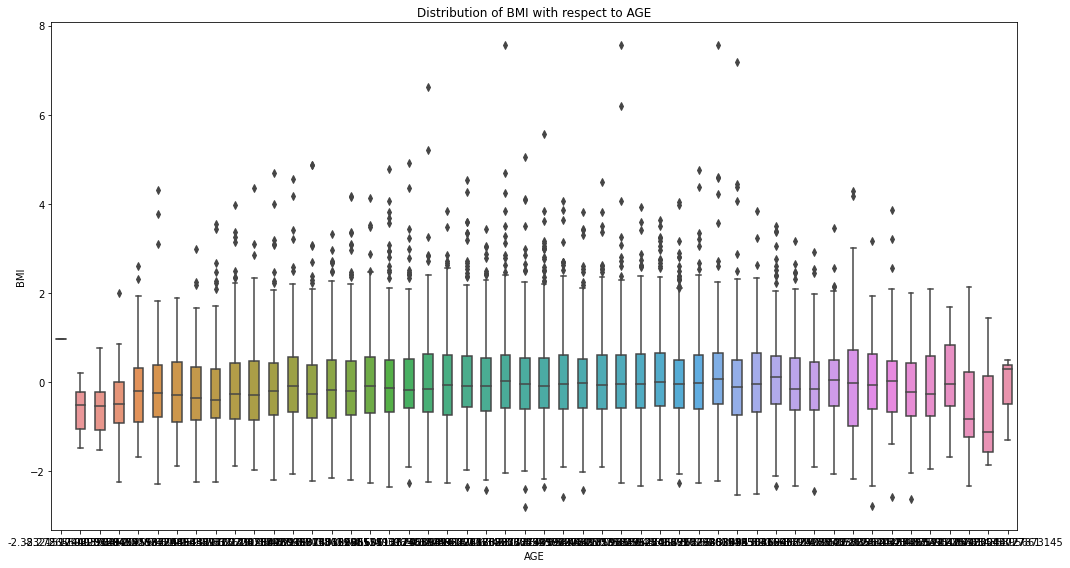

In [20]:
plt.figure(figsize=(15, 8))

# Create a box plot for 'SYSBP' with respect to 'AGE'
sns.boxplot(x='AGE', y='SYSBP', data=data, width=0.5)
plt.xlabel('AGE')
plt.ylabel('SYSBP')
plt.title('Distribution of SYSBP with respect to AGE')

plt.figure(figsize=(15, 8))

# Create a box plot for 'DIABP' with respect to 'AGE'
sns.boxplot(x='AGE', y='DIABP', data=data, width=0.5)
plt.xlabel('AGE')
plt.ylabel('DIABP')
plt.title('Distribution of DIABP with respect to AGE')

plt.figure(figsize=(15, 8))

# Create a box plot for 'GLUCOSE' with respect to 'AGE'
sns.boxplot(x='AGE', y='GLUCOSE', data=data, width=0.5)
plt.xlabel('AGE')
plt.ylabel('GLUCOSE')
plt.title('Distribution of GLUCOSE with respect to AGE')

plt.figure(figsize=(15, 8))

# Create a box plot for 'BMI' with respect to 'AGE'
sns.boxplot(x='AGE', y='BMI', data=data, width=0.5)
plt.xlabel('AGE')
plt.ylabel('BMI')
plt.title('Distribution of BMI with respect to AGE')

plt.tight_layout()
plt.show()


In [21]:
def _ctd_score(surv, times, labs):
    d = 0
    n = 0
    ai = 0

    surv = surv[np.reshape(labs, (-1)) == 1, :]
    times = times[np.reshape(labs, (-1)) == 1, :]
    labs = labs[np.reshape(labs, (-1)) == 1]

    for i in range(times.shape[0]):
        ai = (times > times[i]) * 1
        n += np.sum(ai * (surv[i, np.where(times==times[i])[0]] < surv[:, np.where(times==times[i])[0]]))
        d += np.sum(ai)

    return n / d

In [22]:
fil = data['DIFCVD'] >= 0
data = data[fil]
event = event[fil]

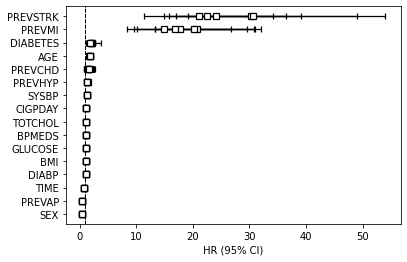

In [23]:
from lifelines.fitters.coxph_fitter import CoxPHFitter
from sklearn.model_selection import StratifiedKFold

cph = CoxPHFitter(alpha=0.05)
n_splits = 5
skf = StratifiedKFold(n_splits=n_splits)

## CCDFs corresponding to each split
ccdfs_cox = []

## ctd-indices and c-indices corresponding to each split
ctd_indices_cox = []
c_indices_cox = []

## 5-fold splitting
for train_ind, test_ind in skf.split(data,event):
    combined_df_train, combined_df_test = data.iloc[train_ind], data.iloc[test_ind]
    event_train, event_test = event.iloc[train_ind], event.iloc[test_ind]
    time_train, time_test = difcvd.iloc[train_ind], difcvd.iloc[test_ind]

    ## Fit the model to the train set
    cph.fit(combined_df_train,duration_col='DIFCVD',event_col='CVD',fit_options={'step_size':0.1})

    ## Predict CCDF (survival probability) from Cox PH model
    ccdf = cph.predict_survival_function(combined_df_test).reset_index()
    ccdf.rename(columns={'index':'TIME'},inplace=True)
    ccdfs_cox.append(ccdf)

    ## Change arrays for ctd-index
    ccdf = np.array(ccdf.T)[1:]
    time_test = np.array(time_test)
    event_test = np.array(event_test)

    ctd_index = _ctd_score(ccdf,time_test,event_test)
    ctd_indices_cox.append(ctd_index)
    c_indices_cox.append(cph.concordance_index_)

    # cph.print_summary()
    cph.plot(hazard_ratios=1)

In [24]:
print(f"Mean ctd-index: {np.mean(ctd_indices_cox)}")
print(f"Mean C-index: {np.mean(c_indices_cox)}")

Mean ctd-index: 0.730282511241754
Mean C-index: 0.7585189886881787


In [25]:
ccdfs_cox

[        TIME         0         1         2         3         4         5  \
 0        0.0  0.997924  0.997150  0.998062  0.998177  0.998238  0.993990   
 1       10.0  0.997893  0.997108  0.998033  0.998150  0.998212  0.993902   
 2       13.0  0.997893  0.997108  0.998033  0.998150  0.998212  0.993902   
 3       16.0  0.997863  0.997066  0.998005  0.998123  0.998186  0.993814   
 4       22.0  0.997863  0.997066  0.998005  0.998123  0.998186  0.993814   
 ...      ...       ...       ...       ...       ...       ...       ...   
 3131  8747.0  0.884253  0.844550  0.891517  0.897628  0.900899  0.699921   
 3132  8753.0  0.884253  0.844550  0.891517  0.897628  0.900899  0.699921   
 3133  8754.0  0.884029  0.844256  0.891306  0.897429  0.900706  0.699407   
 3134  8758.0  0.883805  0.843962  0.891095  0.897229  0.900512  0.698893   
 3135  8766.0  0.883805  0.843962  0.891095  0.897229  0.900512  0.698893   
 
              6         7         8  ...      2307      2311      2312  \


In [42]:
from sksurv.ensemble import RandomSurvivalForest
from sksurv.functions import StepFunction
from lifelines.utils import concordance_index

In [43]:
rsf = RandomSurvivalForest(n_estimators=10, min_samples_split=6, min_samples_leaf=3)

In [44]:
time = (data['DIFCVD'].astype(int))
data1 = data.drop(columns = ['TIME','CVD','DIFCVD'])

In [45]:
ccdfs = []

## ctd-indices corresponding to each split
ctd_indices_rsf = []

## c-indices corresponding to each split
c_inds_rsf = []

## 5-fold splitting
for train_ind, test_ind in skf.split(data1,event):
    data_train, data_test = data1.iloc[train_ind], data1.iloc[test_ind]
    event_train, event_test = event.iloc[train_ind], event.iloc[test_ind]
    time_train, time_test = time.iloc[train_ind], time.iloc[test_ind]

    ## Define target variable array with event label and time of event
    label_train = np.array(list(zip(np.array(event_train),np.array(time_train))), dtype=[('EVENT',bool),('TIME',float)])
    label_test = np.array(list(zip(np.array(event_test),np.array(time_test))), dtype=[('EVENT',bool),('TIME',float)])

    ## Fit the model to the train set
    rsf.fit(data_train,label_train)

    ## Predict CCDF (survival probability) from RSF model
    ccdf_pred = rsf.predict_survival_function(data_test, return_array=False)

    ## Changing format of returned CCDF
    ccdf = ccdf_pred[0].x
    vals = []
    for val in ccdf_pred:
        vals.append(val.y)

    ## Convert to df
    ccdf = pd.DataFrame(data=vals,columns=ccdf.tolist())
    ccdfs.append(ccdf)

    ## Change arrays for ctd-index
    ccdf = np.array(ccdf)
    time_test = np.array(time_test).reshape(-1,1)
    event_test = np.array(event_test)

    ## ctd-index
    ctd_index = _ctd_score(ccdf,time_test,event_test)
    ctd_indices_rsf.append(ctd_index)

    c_ind = concordance_index(event_times=np.array(time_test).reshape(-1,1),
                            event_observed=np.array(event_test).reshape(-1,1),
                            predicted_scores=rsf.predict((data_test)))
    
    c_inds_rsf.append(c_ind)

In [46]:
ccdfs

[        0.0       10.0      13.0      16.0      22.0      26.0      28.0    \
 0     0.998364  0.998364  0.998364  0.998329  0.998329  0.998212  0.997922   
 1     0.998640  0.998640  0.998640  0.998605  0.998605  0.998488  0.998199   
 2     0.997667  0.997667  0.997667  0.997632  0.997632  0.997632  0.997632   
 3     0.997035  0.997035  0.997035  0.997001  0.997001  0.997001  0.997001   
 4     0.994737  0.994737  0.994737  0.994702  0.994702  0.994702  0.994702   
 ...        ...       ...       ...       ...       ...       ...       ...   
 2213  0.998534  0.998534  0.998534  0.998500  0.998500  0.998500  0.998500   
 2214  0.998558  0.998558  0.998558  0.998048  0.998048  0.998048  0.998048   
 2215  0.998120  0.998120  0.998120  0.998085  0.998085  0.998085  0.998085   
 2216  0.998120  0.998120  0.998120  0.998085  0.998085  0.998085  0.998085   
 2217  0.996884  0.996884  0.996884  0.996849  0.996849  0.996849  0.996849   
 
         34.0      38.0      47.0    ...    8723.0

In [51]:
print(f"Mean ctd-index: {np.mean(ctd_indices_rsf)}")
print(f"Mean C-index: {np.mean(c_inds_rsf)}")

Mean ctd-index: 0.6661307705072865
Mean C-index: 0.6901307705072864


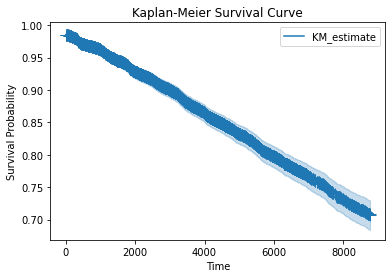

In [58]:
from lifelines import KaplanMeierFitter
from lifelines.utils import concordance_index
import matplotlib.pyplot as plt

kmf = KaplanMeierFitter()
kmf.fit(durations=time,event_observed=event.astype(bool),alpha=0.0001)

kmf.plot_survival_function(show_censors=True)
plt.title("Kaplan-Meier Survival Curve")
plt.xlabel('Time')
plt.ylabel('Survival Probability')
plt.show()

In [60]:
from mortality_pred_package import MortalityPredictor

mp_ada = MortalityPredictor(mode=0,path="/Users/akshatgupta/Desktop/IIITD/SEM_5/ML/ML-Project/dataset/framingham.csv",n_split=5,standardize=True)
mp_ada.run()

In [61]:
print(f"Mean ctd-index: {np.mean(mp_ada.scores)}")

Mean ctd-index: 0.5456287049514452


In [ ]:
from mortality_pred_package import MortalityPredictor

mp_logitr = MortalityPredictor(mode=1,path="/Users/akshatgupta/Desktop/IIITD/SEM_5/ML/ML-Project/dataset/framingham.csv",n_split=5,standardize=True)
mp_logitr.run()

In [2]:
print(f"Mean ctd-index: {np.mean(mp_logitr.scores)}")

Mean ctd-index: 0.5800128749154425


In [ ]:
from mortality_pred_package import MortalityPredictor

mp_rf = MortalityPredictor(mode=2,path="/Users/akshatgupta/Desktop/IIITD/SEM_5/ML/ML-Project/dataset/framingham.csv",n_split=5,standardize=True)
mp_rf.run()

In [7]:
print(f"Mean ctd-index: {np.mean(mp_rf.scores)}")

Mean ctd-index: 0.5408976842224988
